#Predicting house prices using linear regression model

#Table of Content
**Data Acquisition and Exploration**

**Regression Analysis**

Apply regression analysis techniques and EDA principles to make inferences about pricing for all records included in the data set

Freely remove/manipulate/transform features from the data set as you see fit

Graphically and numerically describe model performance (residuals, rmse, etc.) Identify 3-5 inferences that you believe are noteworthy and document them

Select an area that you are most and least comfortable providing pricing recommendations and defend your assertions / claims with data

In [40]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['figure.figsize'] = (30, 10)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale

#Import the dataset

Introducing the Australia house listing dataset

In [41]:
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT_h5q-brvrLvh_rz1QZESrrYenvL3hN0pd-0FaIEFqxW6584mFz9IfJFjuVBmoJkh9sPVjRNtRRlqW/pub?gid=7681132&single=true&output=csv"
australia_listing = pd.read_csv(data_path)
australia_listing.head()

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,3363954,Australia,NSW,BALLINA SHIRE COUNCIL,House,0.00,"$2,900.00",Entire home/apt,3.0,4.0,4.0
1,13048065,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,$28.00,Private room,1.0,1.0,1.0
2,1451202,Australia,NSW,BALLINA SHIRE COUNCIL,Guest suite,15.00,$141.00,Entire home/apt,1.0,1.0,1.0
3,2345959,Australia,NSW,BALLINA SHIRE COUNCIL,House,17.99,$50.00,Private room,4.0,4.0,3.0
4,26087141,Australia,NSW,BALLINA SHIRE COUNCIL,House,18.15,$52.00,Private room,1.0,1.0,1.0


# Describing the data

The dataset consists of 11 columns:

**id**: This is the unique id that describes each variable

**country**: The houses are described in Australia

**state**: It represents the state of the houses

**neighbourhood_cleansed**: It describes the neighbourhood where the house lies

**property_type**: It is the kind of property of the house

**square_meters**: It is the area of the house in square_meters

**price**: The price in dollars

**room_type**: There are 3 categories: Private room, Shared room, Entire home/apt

**bathrooms**: Number of bathrooms in the house

**bedrooms**: Number of bedrooms in the house

**beds**: Number of beds in the house

**Extra information:**

**bathroom description:**  "bathroom" is a single room that includes a sink, bathtub/shower and a toilet (that is why it is logical that we say "go to the bathroom" for aller aux toilettes).

A "half-bath" is a toilet and a sink. Also called a lavatory (or a powder room by real estate agents). 

e.g. 3 1/2 baths would be three full bathrooms and one half-bath.

Text(0.5, 1.0, 'Count of bathroom')

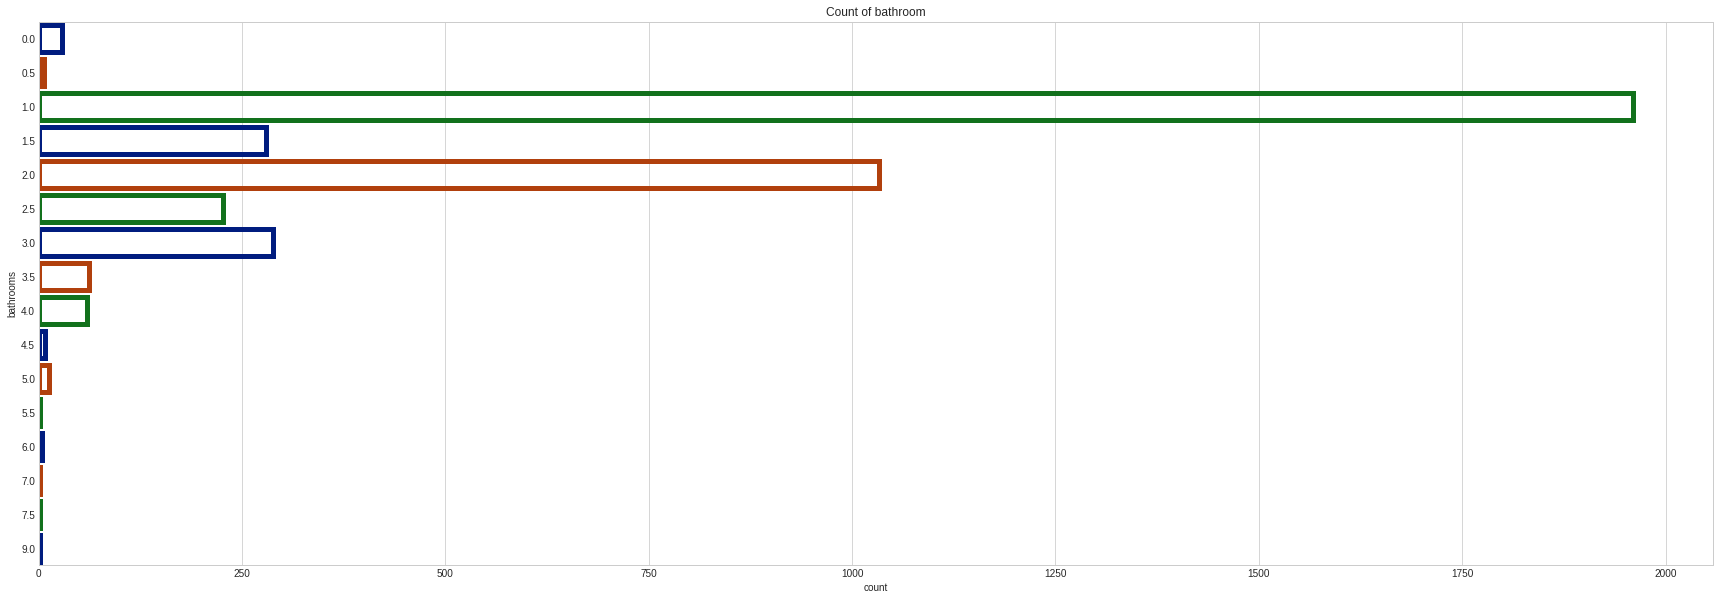

In [42]:
sns.countplot(y="bathrooms", data=australia_listing,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
plt.title("Count of bathroom")

Describing each variable using list function

In [43]:
list(australia_listing)

['id',
 'country',
 'state',
 'neighbourhood_cleansed',
 'property_type',
 'square_meters',
 'price',
 'room_type',
 'bathrooms',
 'bedrooms',
 'beds']

Dropping columns which are not relevant in calculating the relationship between the numerical features

In [44]:
australia_listing1 = australia_listing.drop(columns = ['id', 'country', 'state'])

Run list command to make sure that extra columns are dropped

In [45]:
list(australia_listing1)

['neighbourhood_cleansed',
 'property_type',
 'square_meters',
 'price',
 'room_type',
 'bathrooms',
 'bedrooms',
 'beds']

#Describing qualitative features

The below mentioned 3 graphs represents different types of neighbourhood_cleansed, property type and room type.

Text(0.5, 1.0, 'Different types of neighbourhood cleansed')

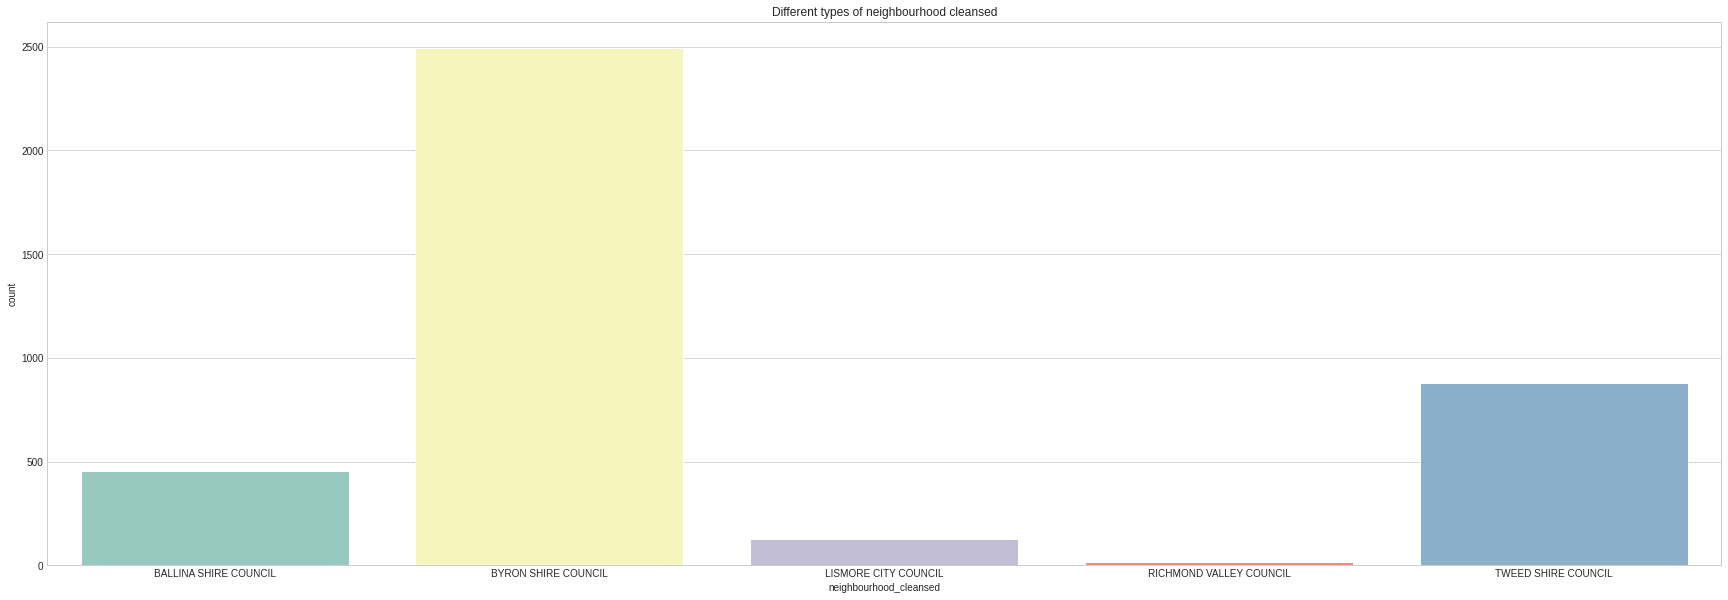

In [46]:
ax = sns.countplot(x="neighbourhood_cleansed", data=australia_listing1, palette="Set3")
plt.title("Different types of neighbourhood cleansed")

Text(0.5, 1.0, 'Different types of property')

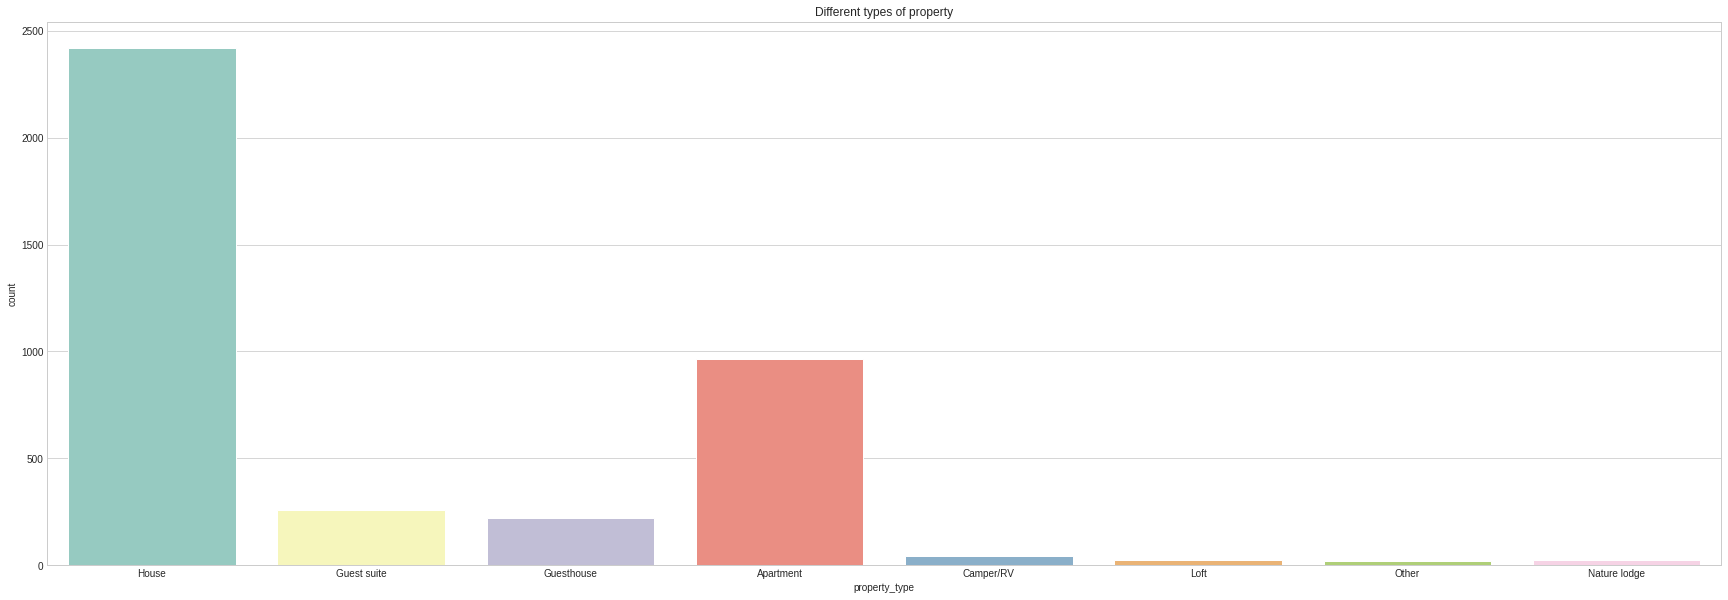

In [47]:
ax = sns.countplot(x="property_type", data=australia_listing1, palette="Set3")
plt.title("Different types of property")

Text(0.5, 1.0, 'Different types of room')

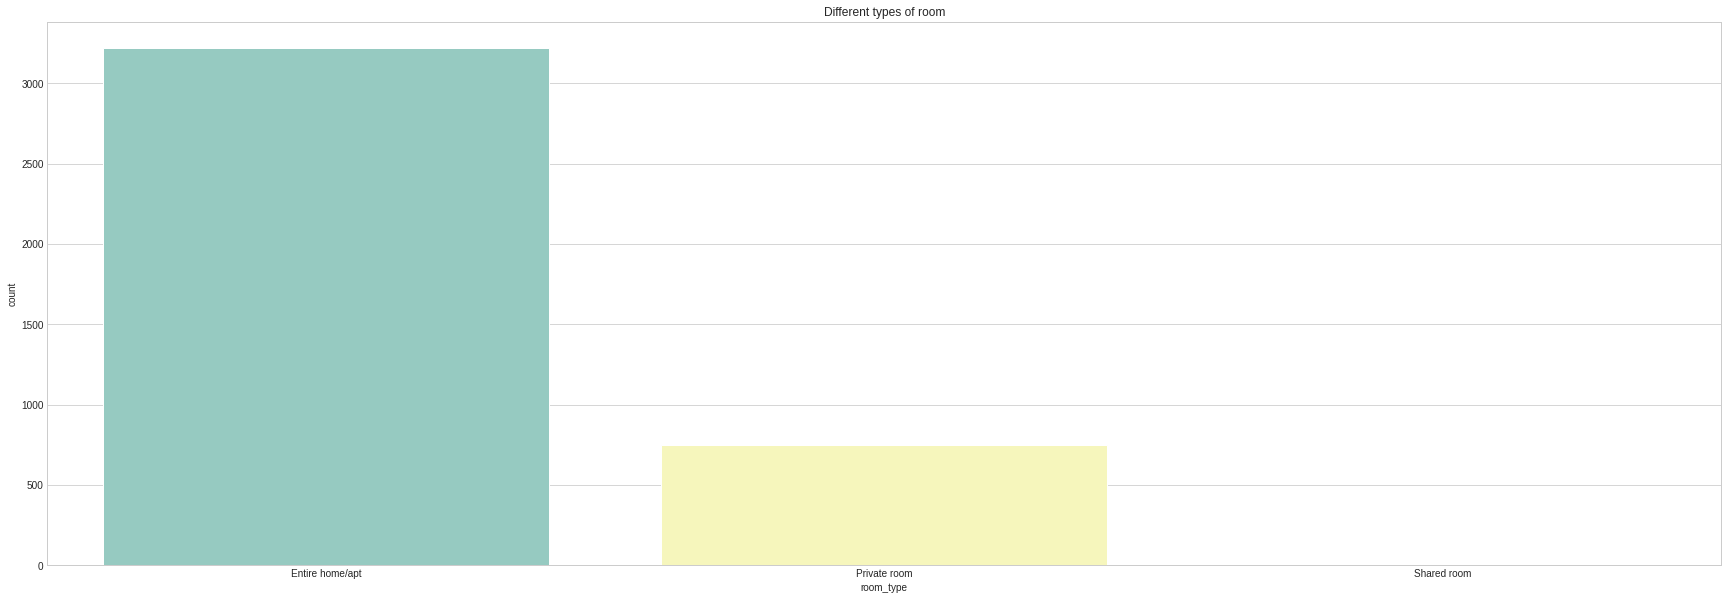

In [48]:
ax = sns.countplot(x="room_type", data=australia_listing1, palette="Set3")
plt.title("Different types of room")

info() command tells that there are 3974 total entries and describes the dtype of each variable

In [49]:
australia_listing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3974 non-null   object 
 1   property_type           3974 non-null   object 
 2   square_meters           3974 non-null   float64
 3   price                   3974 non-null   object 
 4   room_type               3974 non-null   object 
 5   bathrooms               3974 non-null   float64
 6   bedrooms                3972 non-null   float64
 7   beds                    3973 non-null   float64
dtypes: float64(4), object(4)
memory usage: 248.5+ KB


#Describing numerical features

Remove '$' sign from variable 'price' to make it in dtype float, so that we can easily describe numerical features

In [50]:
australia_listing1['price'] = australia_listing1['price'].str.replace(',', '')
australia_listing1['price'] = australia_listing1['price'].str.replace('$', '')
australia_listing1['price'] = australia_listing1['price'].astype(float)

In [51]:
australia_listing1.describe()

,square_meters,price,bathrooms,bedrooms,beds
count,3974.000000,3974.000000,3974.000000,3972.000000,3973.000000
mean,32.670813,802.004781,1.635254,2.262840,2.982884
std,12.394545,885.335192,0.833714,1.368016,1.993749
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,24.775000,200.000000,1.000000,1.000000,1.000000
50%,29.680000,509.000000,1.000000,2.000000,3.000000
75%,35.200000,1100.000000,2.000000,3.000000,4.000000
max,208.700000,11500.000000,9.000000,12.000000,18.000000


#Outlier Analysis and Removing

The boxplot shows that there are lot of outliers in the data which is creating noise. These outliers have to be removed.

[Text(0, 0.5, 'Range'), Text(0.5, 0, 'Price')]

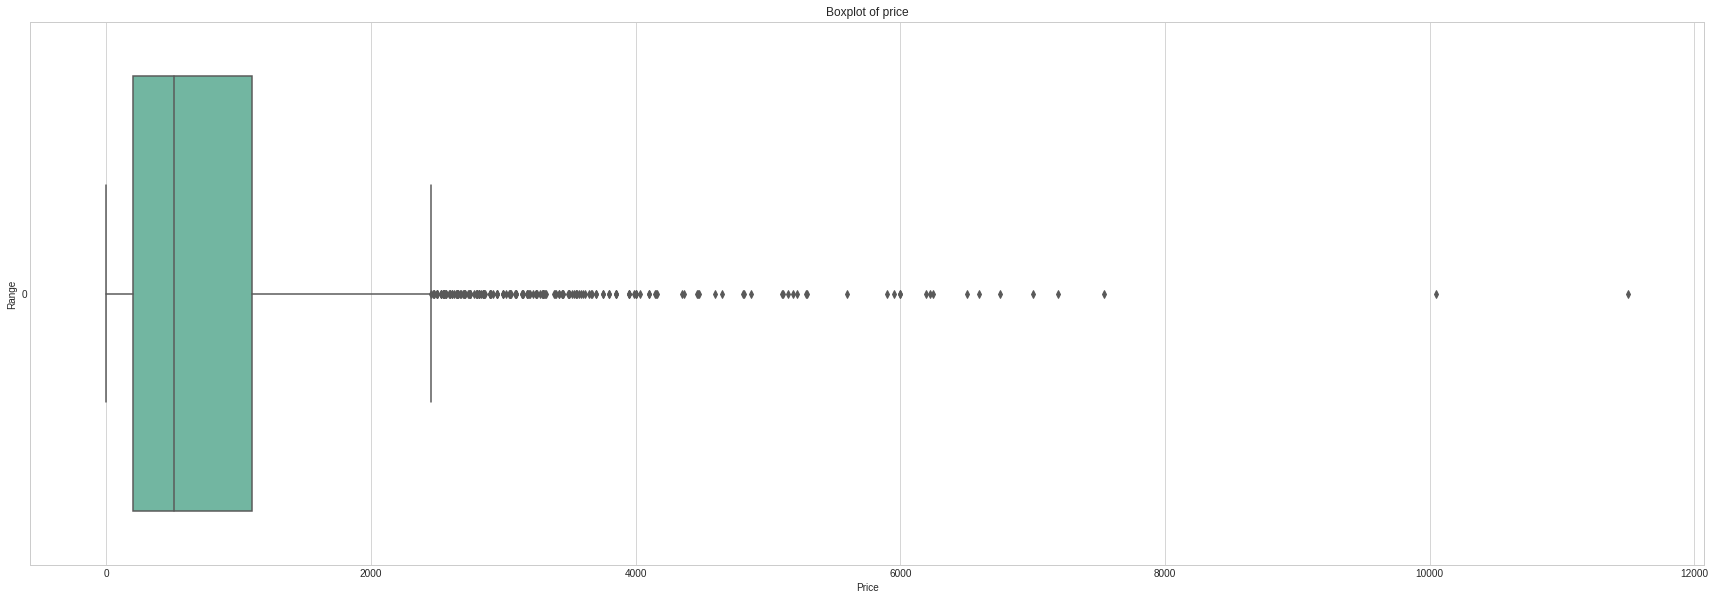

In [52]:
box_plot = sns.boxplot(data=australia_listing1['price'], orient="h", palette="Set2")
plt.title("Boxplot of price")
box_plot.set(xlabel='Price',ylabel='Range')

Removing the outliers

In [53]:
starting_percentile = australia_listing1['price'].quantile(.01)
ending_percentile = australia_listing1['price'].quantile(.99)
australia_listing_outliers = australia_listing1.loc[((australia_listing1['price'] <= starting_percentile) | (australia_listing1['price'] >= ending_percentile))]
australia_listing_trimmed = australia_listing1.loc[((australia_listing1['price'] > starting_percentile) & (australia_listing1['price'] < ending_percentile))]

In [54]:
australia_listing_trimmed_cleaned = australia_listing_trimmed.copy()

Filtering the data

In [55]:
australia_listing_filtered = australia_listing_trimmed.loc[(australia_listing_trimmed['neighbourhood_cleansed'].isin(['BALLINA SHIRE COUNCIL']))]
australia_listing_filtered = australia_listing_filtered.loc[(australia_listing_filtered['property_type'].isin(['House']))]
australia_listing_filtered = australia_listing_filtered.loc[(australia_listing_filtered['room_type'] == 'Entire home/apt')]

In [56]:
australia_listing_filtered = australia_listing_filtered.dropna()

Using head() command to have a look over filtered data

In [57]:
australia_listing_filtered.head()

,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,BALLINA SHIRE COUNCIL,House,0.00,2900.0,Entire home/apt,3.0,4.0,4.0
30,BALLINA SHIRE COUNCIL,House,18.57,75.0,Entire home/apt,1.0,2.0,2.0
48,BALLINA SHIRE COUNCIL,House,20.09,89.0,Entire home/apt,1.0,1.0,1.0
51,BALLINA SHIRE COUNCIL,House,20.86,105.0,Entire home/apt,2.0,3.0,3.0
63,BALLINA SHIRE COUNCIL,House,23.29,136.0,Entire home/apt,1.0,1.0,1.0


In [58]:
australia_listing_filtered.value_counts()

neighbourhood_cleansed  property_type  square_meters  price   room_type        bathrooms  bedrooms  beds
BALLINA SHIRE COUNCIL   House          67.89          3490.0  Entire home/apt  7.0        8.0       11.0    1
                                       31.53          560.0   Entire home/apt  2.0        4.0       3.0     1
                                       33.73          611.0   Entire home/apt  3.0        4.0       5.0     1
                                       33.71          610.0   Entire home/apt  1.0        0.0       1.0     1
                                       33.37          525.0   Entire home/apt  1.5        1.0       2.0     1
                                                                                                           ..
                                       44.58          1220.0  Entire home/apt  4.0        6.0       6.0     1
                                                      1025.0  Entire home/apt  2.0        3.0       4.0     1
               

In [59]:
australia_listing_filtered[['neighbourhood_cleansed','property_type','room_type']].describe()

,neighbourhood_cleansed,property_type,room_type
count,200,200,200
unique,1,1,1
top,BALLINA SHIRE COUNCIL,House,Entire home/apt
freq,200,200,200


#Check the missing values

The data shows that there is no missing value

In [60]:
australia_listing_filtered.isnull().sum()

neighbourhood_cleansed    0
property_type             0
square_meters             0
price                     0
room_type                 0
bathrooms                 0
bedrooms                  0
beds                      0
dtype: int64

In [61]:

australia_listing_filtered.describe()

,square_meters,price,bathrooms,bedrooms,beds
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,39.169000,1008.725000,2.097500,3.245000,4.235000
std,12.302742,757.297157,0.896248,1.246089,1.959329
min,0.000000,75.000000,1.000000,0.000000,1.000000
25%,29.155000,395.750000,1.500000,3.000000,3.000000
50%,38.520000,796.500000,2.000000,3.000000,4.000000
75%,47.422500,1482.500000,2.500000,4.000000,5.000000
max,67.890000,4000.000000,7.000000,8.000000,11.000000


#Correlation between numerical variables

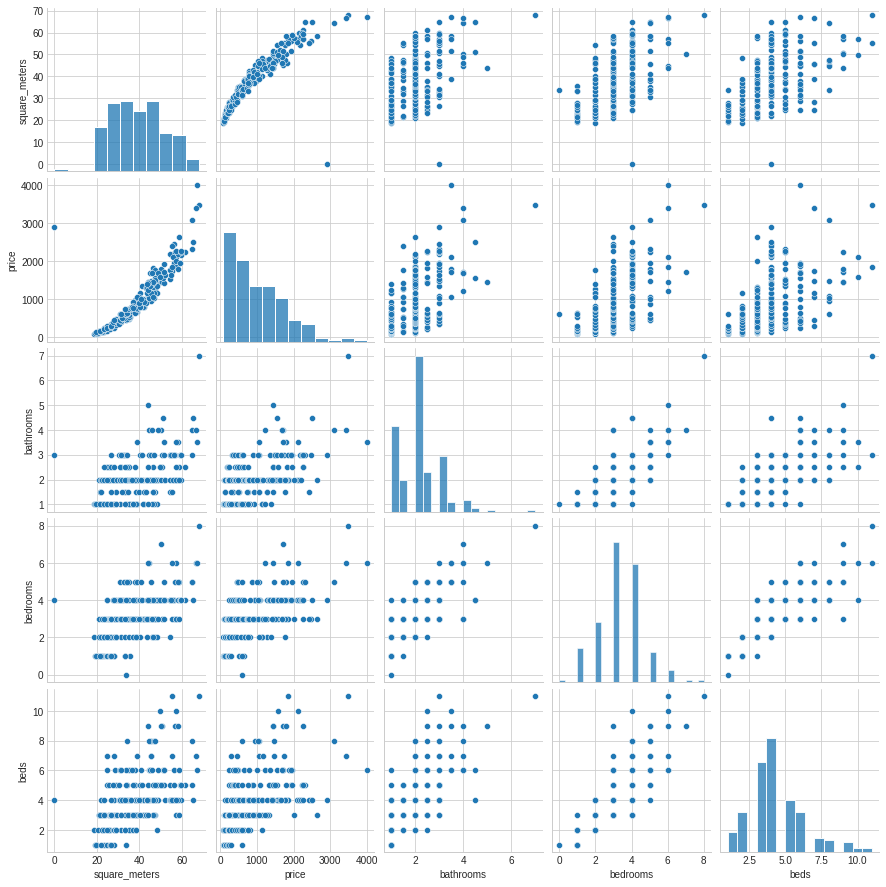

In [62]:
sns.pairplot(australia_listing_filtered,diag_kind="hist")

The analysis proves that there is strong positive and linear relationship between square_meters and price. We can do further analysis between variables

In [63]:
corr= australia_listing_filtered.corr()
corr

,square_meters,price,bathrooms,bedrooms,beds
square_meters,1.000000,0.874771,0.496398,0.549815,0.511371
price,0.874771,1.000000,0.569515,0.574719,0.501268
bathrooms,0.496398,0.569515,1.000000,0.736679,0.663659
bedrooms,0.549815,0.574719,0.736679,1.000000,0.791352
beds,0.511371,0.501268,0.663659,0.791352,1.000000


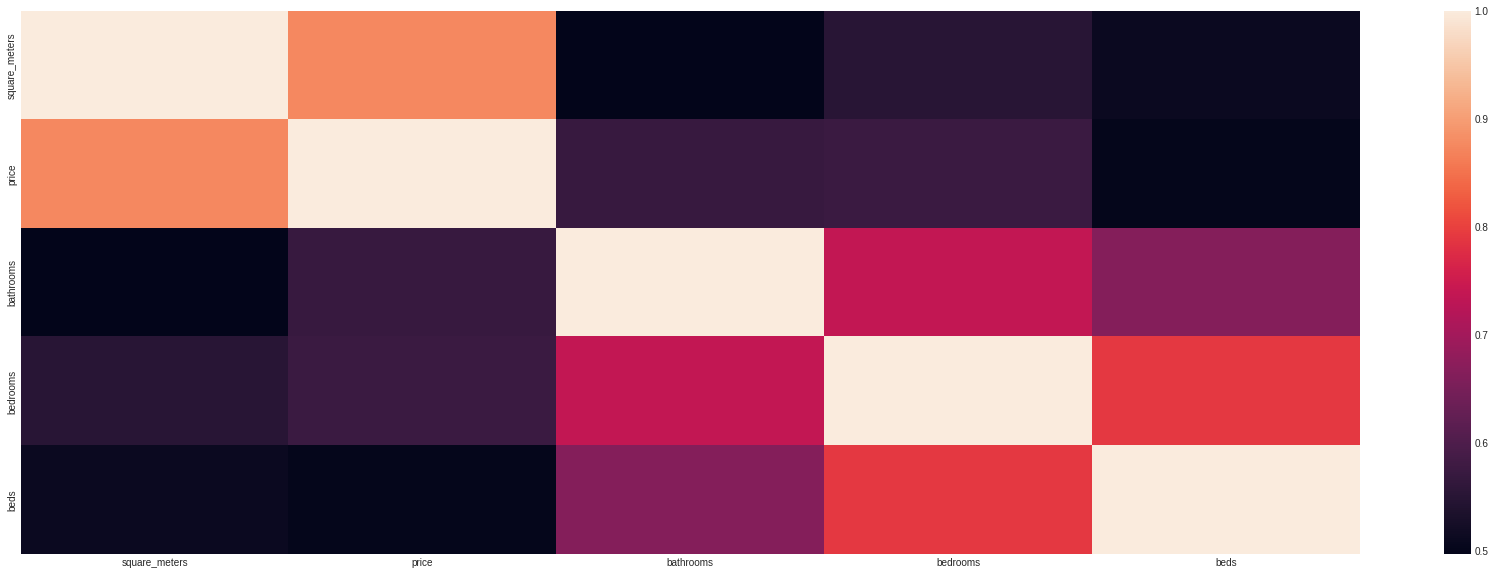

In [64]:
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

**Run basic regression between square_meters and price:**

In [65]:
australia_data = australia_listing_filtered[['square_meters']].values
australia_data1 = australia_listing_filtered[['price']].values

australia_data_names = ['square_meters', 'price']

X,y = scale(australia_data),australia_data1

In [66]:
LinReg = LinearRegression()

LinReg.fit(X,y)

print(LinReg.score(X,y))

0.7652234487716898


#Visualization of variables using scatter and regplot

Text(0.5, 1.0, 'Square meters vs price')

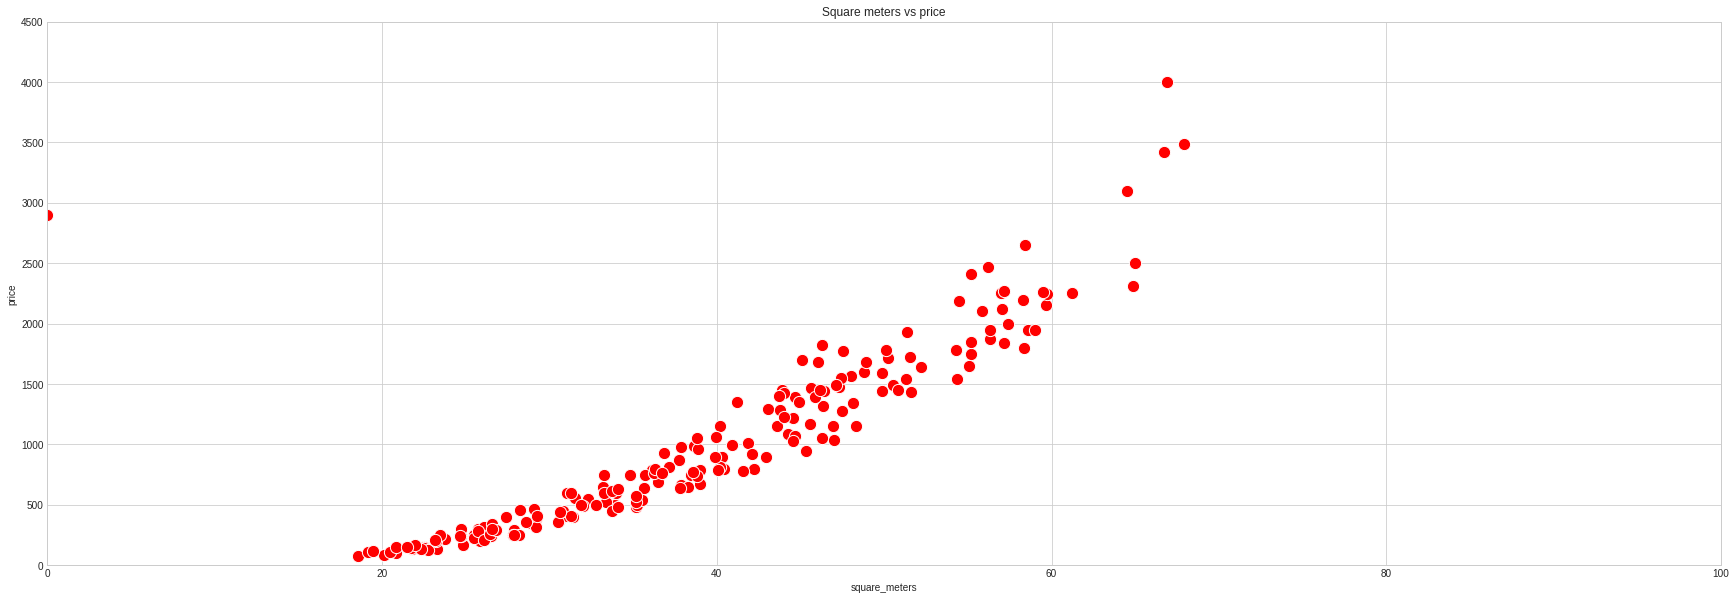

In [67]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = australia_listing_filtered, s=150, c=['red'])
plt.xlim([0,100])
plt.ylim([0,4500])
plt.title('Square meters vs price')

Text(0.5, 1.0, 'Square meters vs price')

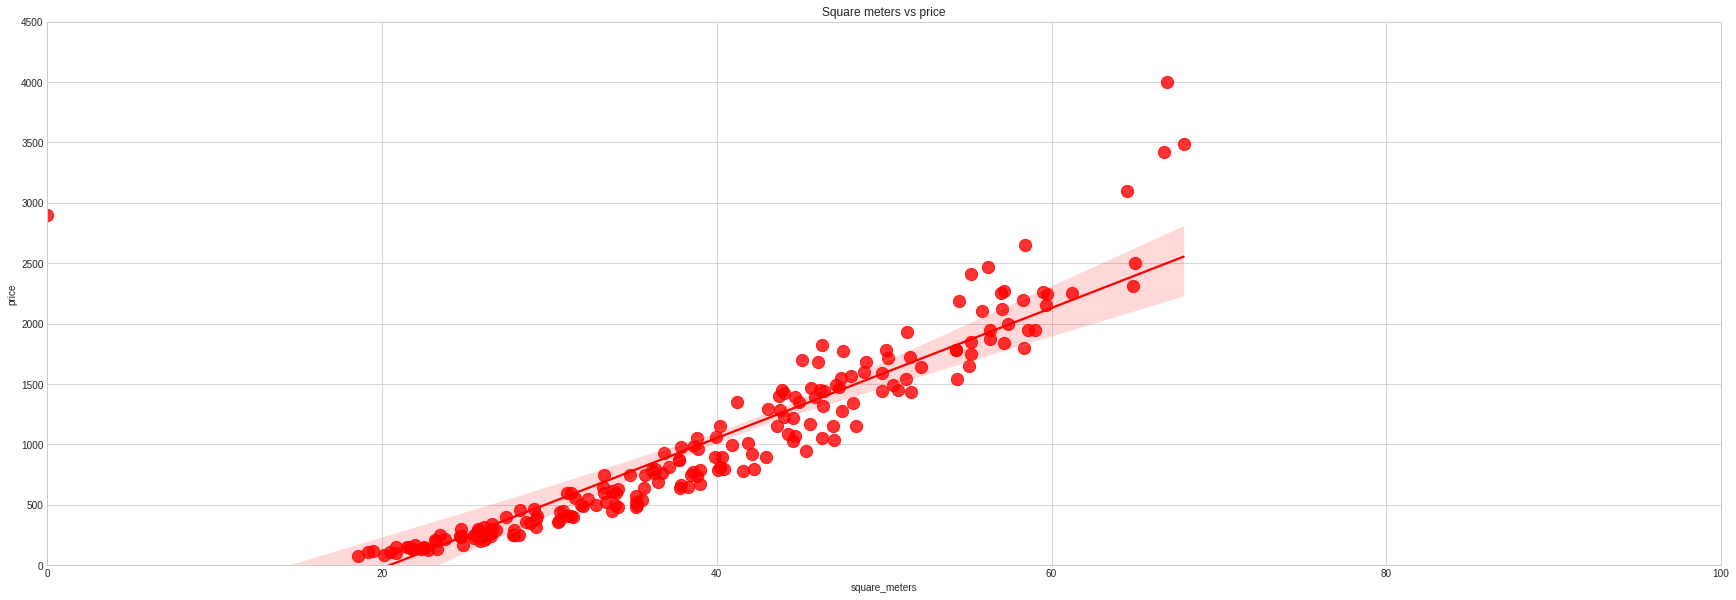

In [68]:
ax = sns.regplot(x = 'square_meters', y = 'price', data = australia_listing_filtered, scatter_kws={'s':150},color='r')
plt.xlim([0,100])
plt.ylim([0,4500])
plt.title('Square meters vs price')

#Calculating LinearRegression 

In [69]:
X_cols = ['square_meters']

#Load the X data set
X = australia_listing_filtered[X_cols].values

#Initialize the data and column length variables
data_length = len(australia_listing_filtered)
column_length = len(australia_listing_filtered[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = australia_listing_filtered['price'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

In [70]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0   1853.301546
1    648.327848
2   2523.777363
3    499.275112
4   1181.256754

Intercept: -1026.8157085242185
   square_meters
0      52.299206

Mean Squared Error (MSE):57029.17
Variance Score (R^2):0.89


**The above calculation shows that** 

price = 51.45 * square_meters + (-1009)

**This shows the relationship between price and square_meters. We can put value of square_meters within the range in which the linear regression analysis is performed, and we will get the value of price.** 

MSE: It shows that appropriateness of linear regression model. The lesser the MSE, the model will be more accurate.

R2: It gives information about the goodness of fit of a model. The value near to 1 means that regression predictions perfectly fit the data.

**In this case: R is near to 1 which means predictions perfectly fit the data**. 

In [71]:
X_cols2 = ['square_meters','bathrooms']

#Load the X data set
X2 = australia_listing_filtered[X_cols2].values

#Initialize the data and column length variables
data_length2 = len(australia_listing_filtered)
column_length2 = len(australia_listing_filtered[X_cols2].columns)

#Reshape and load remaining data sets
X2 = X2.reshape(data_length2,column_length2)
y2 = australia_listing_filtered['price'].values
y2 = y2.reshape(data_length2,1)

#Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2)

#Create the linear regression object and train/fit models
lin_reg2= LinearRegression()
lin_reg2.fit(X_train2, y_train2)

#Make predictions using the testing set
listing_y_pred2 = lin_reg2.predict(X_test2)

In [72]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred2, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg2.intercept_))

#Print the coefficient(s)
coeff_df2 = pd.DataFrame(lin_reg2.coef_)
coeff_df2.columns = X_cols2
print(coeff_df2)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test2, listing_y_pred2))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test2, listing_y_pred2))

   y_prediction
0   1428.398292
1   1840.369936
2    575.238370
3   1593.871233
4   1934.605653

Intercept: -1199.0558492453777
   square_meters   bathrooms
0      46.612096  187.539193

Mean Squared Error (MSE):55867.76
Variance Score (R^2):0.89


**The above calculation shows that** 

price = 45.90 * square_meters + 170.34 * bathrooms + (-1142)

**This shows the relationship between price, square_meters and bathrooms. We can put value of square_meters and bathrooms within the range(for better prediction) in which the linear regression analysis is performed, and we will get the value of price.** 

MSE: It shows that appropriateness of linear regression model. The lesser the MSE, the model will be more accurate.

This model looks more accurate as the MSE values are slighly lesser than the previous model.

R2: It gives information about the goodness of fit of a model. The value near to 1 means that regression predictions perfectly fit the data.

**In this case: R is near to 1 which means predictions perfectly fit the data**. 

In [73]:
X_cols2 = ['square_meters','bedrooms']

#Load the X data set
X2 = australia_listing_filtered[X_cols2].values

#Initialize the data and column length variables
data_length2 = len(australia_listing_filtered)
column_length2 = len(australia_listing_filtered[X_cols2].columns)

#Reshape and load remaining data sets
X2 = X2.reshape(data_length2,column_length2)
y2 = australia_listing_filtered['price'].values
y2 = y2.reshape(data_length2,1)

#Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2)

#Create the linear regression object and train/fit models
lin_reg2= LinearRegression()
lin_reg2.fit(X_train2, y_train2)

#Make predictions using the testing set
listing_y_pred2 = lin_reg2.predict(X_test2)

In [74]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred2, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg2.intercept_))

#Print the coefficient(s)
coeff_df2 = pd.DataFrame(lin_reg2.coef_)
coeff_df2.columns = X_cols2
print(coeff_df2)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test2, listing_y_pred2))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test2, listing_y_pred2))

   y_prediction
0    193.020298
1   1116.189910
2   1941.715713
3   1458.380979
4   1157.384598

Intercept: -1022.2706297643772
   square_meters   bedrooms
0      45.268888  77.094098

Mean Squared Error (MSE):117589.77
Variance Score (R^2):0.86


**The above calculation shows that** 

price = 58.07 * square_meters + 23.79 * bedrooms + (-1366)

**This shows the relationship between price, square_meters and bedrooms. We can put value of square_meters and bedrooms within the range(for better prediction) in which the linear regression analysis is performed, and we will get the value of price.** 

MSE: It shows that appropriateness of linear regression model. The lesser the MSE, the model will be more accurate.

In this case, the MSE is higher means the model is less appropriate.

R2: It gives information about the goodness of fit of a model. The value near to 1 means that regression predictions perfectly fit the data.

**In this case: R is not near to 1 which means predictions does not fit the data**. 

#Analysis

We took the data on houses listed in Australia market. The objective of the regression analysis is to understand relationship between different variables, and to predict house prices. 

The first step is to clean and transform the data (e.g, removed extraneous varibales and outliers). Then we analyzed relationships between different variables using correlation plot. 

In order to predict house price, we started regression with one variable - square_meters. Upon running regression analysis, we observed strong fit with R2 value of about 0.90. This suggests that house prices are strongly correlated with squaremeters. 

Subsequently, we added additional variable such as # of bathrooms and # of bedrooms to the analysis. We found that adding additional variables reduced R2, with # of bathrooms resulting in almost similar R2. 

**Inferences:**

1. Adding # of bathrooms to the model is reducing the MSE which means the model is more accurate. Also R2 is near to 1 which shows that prediction perfectly fit the data.
2. Adding # of  bedrooms does not add incremental value to determine price.
2. Range in which model can operate is between 20 to 60 square_meters
3. Correlation analysis shows that there is strong positive relationship between square_meters and price. The price increases with increasing square_meters. We can determine price when the area is known.

**This proves that square_meters and bathrooms are variables that can be used in predicting prices.**

**Select an area that you are most and least comfortable providing pricing recommendations and defend your assertions / claims with data**

The scatter plot between 'square_meters' and 'price' shows that 20-40 square_meters is the area which is most suitable in providing the price recommendations as the graph shows that the difference between predicted value and actual value is less, therefore there are less chances of variation.

Whereas, between 40-60 square_meters, the difference between actual value and predicted value is more, therefore we can say that there are high chances of variation in prices in this range. It means we are least comfortable in providing the price recommendations.

#Outcome/Applications

We can further analyze:

1. **p values of coefficient** -  This will help in checking the significance of the variables.

2. We can further identify the optimum range for the model by splitting the data into quartiles and run regression analysis on each of those to determine where model performs best.

3. Variation by state type - The regression can be performed by categorizing the data according to states.

The other models that can be used for prediction are Logistic Regression, Ensemble model.